# Model Optimization

This notebook demonstrates the use of different optimizers in Keras for training a regression model using the Boston housing dataset.

### Libraries Import

In [12]:
import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist
from matplotlib import pyplot as plt


## Loading Data

In [13]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#Spliting the training Dataset into train and validation
X_valid, X_train = X_train_full[:4000] / 255.0, X_train_full[4000:] / 255.0
y_valid, y_train = y_train_full[:4000], y_train_full[4000:]

# normalize the data
X_valid, X_train = X_train_full[:4000] / 255.0, X_train_full[4000:] / 255.0
y_valid, y_train = y_train_full[:4000], y_train_full[4000:]

print("Data loaded and normalized.")

Data loaded and normalized.


In [18]:
from keras.models import Sequential
from keras.layers import Dense

def build_model(optimizer):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
  return model

### SGD Optimizer
Stochastic Gradient Descent (SGD) includes support for momentum, learning rate decay, and Nesterov momentum.

In [20]:
model_sgd = build_model(tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True))
history = model_sgd.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)

Epoch 1/5
438/438 [==============================] - 2s 4ms/step - loss: 0.6375 - accuracy: 0.7851
Epoch 2/5
438/438 [==============================] - 2s 3ms/step - loss: 0.4545 - accuracy: 0.8414
Epoch 3/5
438/438 [==============================] - 2s 4ms/step - loss: 0.4164 - accuracy: 0.8543
Epoch 4/5
438/438 [==============================] - 3s 6ms/step - loss: 0.3946 - accuracy: 0.8614
Epoch 5/5
438/438 [==============================] - 2s 3ms/step - loss: 0.3756 - accuracy: 0.8687


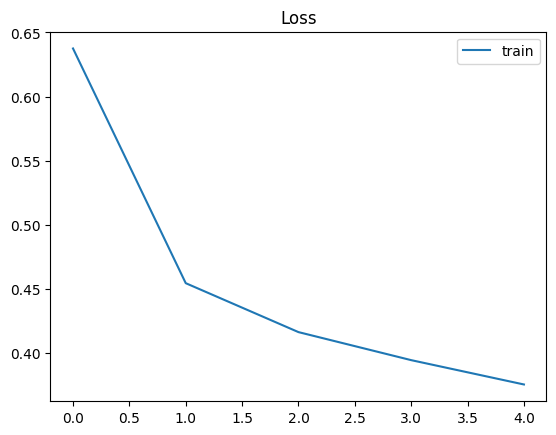

In [21]:
# plot loss during training
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

### RMSprop Optimizer
RMSprop is particularly useful in applications where the optimizer needs to be robust to the initialization of parameters.

In [23]:
model_rmsprop = build_model('rmsprop')
history = model_rmsprop.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)

Epoch 1/5
438/438 [==============================] - 2s 4ms/step - loss: 0.5878 - accuracy: 0.7968
Epoch 2/5
438/438 [==============================] - 3s 7ms/step - loss: 0.4211 - accuracy: 0.8475
Epoch 3/5
438/438 [==============================] - 2s 5ms/step - loss: 0.3733 - accuracy: 0.8658
Epoch 4/5
438/438 [==============================] - 2s 4ms/step - loss: 0.3433 - accuracy: 0.8738
Epoch 5/5
438/438 [==============================] - 2s 5ms/step - loss: 0.3216 - accuracy: 0.8821


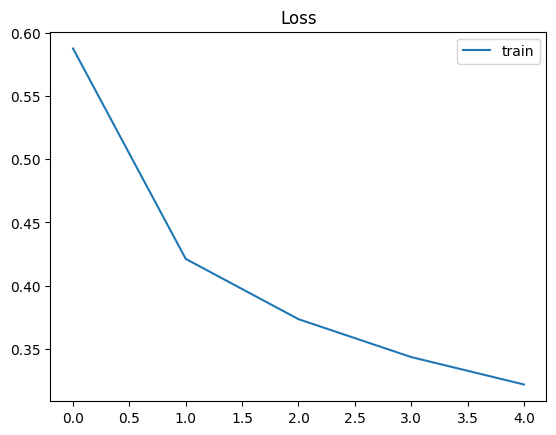

In [24]:
# plot loss during training
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

### Adadelta Optimizer
Adadelta is designed to reduce the aggressive diminishing learning rates of AdaGrad.

In [26]:
model_adadelta = build_model('adadelta')
history = model_adadelta.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)

Epoch 1/5
438/438 [==============================] - 2s 4ms/step - loss: 2.3887 - accuracy: 0.1561
Epoch 2/5
438/438 [==============================] - 2s 5ms/step - loss: 2.2085 - accuracy: 0.2504
Epoch 3/5
438/438 [==============================] - 2s 4ms/step - loss: 2.0555 - accuracy: 0.3466
Epoch 4/5
438/438 [==============================] - 2s 4ms/step - loss: 1.9250 - accuracy: 0.4242
Epoch 5/5
438/438 [==============================] - 4s 8ms/step - loss: 1.8123 - accuracy: 0.4815


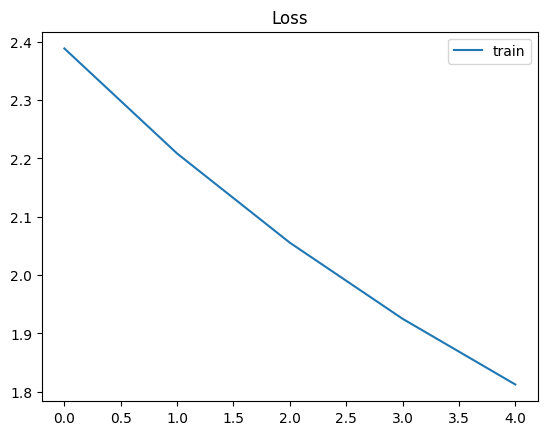

In [27]:
# plot loss during training
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

### Adam Optimizer
Adam is an adaptive learning rate optimizer that is considered to be effective and efficient for a wide range of applications.

In [28]:
model_adam = build_model('adam')
history = model_adam.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)

Epoch 1/5
438/438 [==============================] - 2s 4ms/step - loss: 0.5560 - accuracy: 0.8089
Epoch 2/5
438/438 [==============================] - 2s 4ms/step - loss: 0.4106 - accuracy: 0.8554
Epoch 3/5
438/438 [==============================] - 3s 6ms/step - loss: 0.3701 - accuracy: 0.8683
Epoch 4/5
438/438 [==============================] - 2s 4ms/step - loss: 0.3465 - accuracy: 0.8756
Epoch 5/5
438/438 [==============================] - 2s 4ms/step - loss: 0.3264 - accuracy: 0.8828


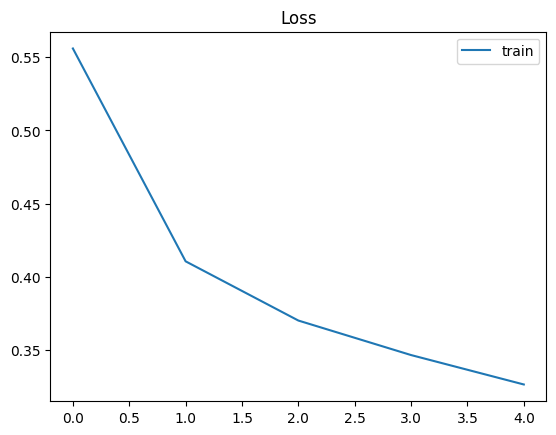

In [29]:
# plot loss during training
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

## Comparison of AdaGrad and Gradient Descent Steps

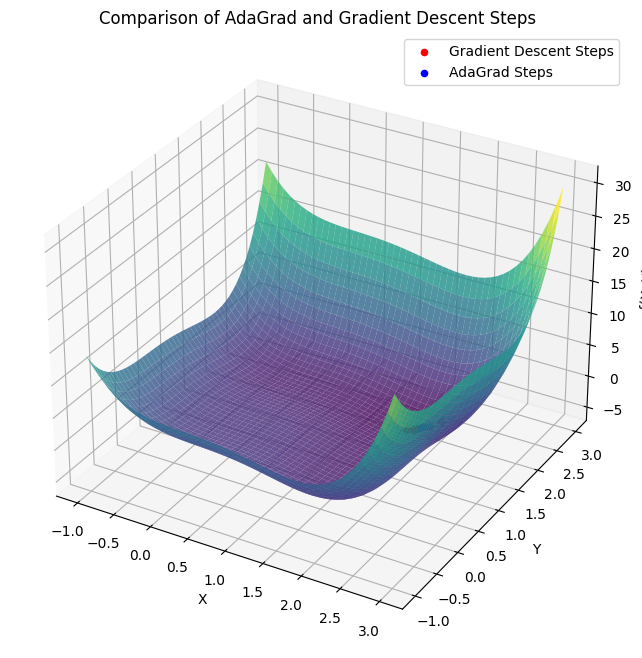

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function and its gradient
def function(x, y):
    return x**4 - 3*x**3 + 2*x**2 - x + y**4 - 3*y**3 + 2*y**2 - y

def gradient(x, y):
    return [4*x**3 - 9*x**2 + 4*x - 1, 4*y**3 - 9*y**2 + 4*y - 1]

# Gradient Descent Algorithm
def gradient_descent(x_initial, y_initial, learning_rate, iterations):
    x_values = [x_initial]
    y_values = [y_initial]
    for i in range(iterations):
        grad = gradient(x_values[-1], y_values[-1])
        x_new = x_values[-1] - learning_rate * grad[0]
        y_new = y_values[-1] - learning_rate * grad[1]
        x_values.append(x_new)
        y_values.append(y_new)
    return x_values, y_values, [function(x, y) for x, y in zip(x_values, y_values)]

# AdaGrad Algorithm
def adagrad(x_initial, y_initial, learning_rate, iterations):
    epsilon = 1e-8  # to prevent division by zero
    x_values = [x_initial]
    y_values = [y_initial]
    squared_gradients = np.zeros_like([x_initial, y_initial], dtype=float)
    for i in range(iterations):
        grad = gradient(x_values[-1], y_values[-1])
        squared_gradients += np.square(grad)
        adjusted_learning_rate = learning_rate / (np.sqrt(squared_gradients) + epsilon)
        x_new = x_values[-1] - adjusted_learning_rate[0] * grad[0]
        y_new = y_values[-1] - adjusted_learning_rate[1] * grad[1]
        x_values.append(x_new)
        y_values.append(y_new)
    return x_values, y_values, [function(x, y) for x, y in zip(x_values, y_values)]

# Parameters
x_initial = 2
y_initial = 2
learning_rate = 0.1
iterations = 50

# Run algorithms
gd_x_steps, gd_y_steps, gd_z_steps = gradient_descent(x_initial, y_initial, learning_rate, iterations)
adagrad_x_steps, adagrad_y_steps, adagrad_z_steps = adagrad(x_initial, y_initial, learning_rate, iterations)

# Generate points for plotting the function surface
x = np.linspace(-1, 3, 50)
y = np.linspace(-1, 3, 50)
x, y = np.meshgrid(x, y)
z = function(x, y)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.8)
ax.scatter(gd_x_steps, gd_y_steps, gd_z_steps, c='red', label='Gradient Descent Steps')
ax.scatter(adagrad_x_steps, adagrad_y_steps, adagrad_z_steps, c='blue', label='AdaGrad Steps')
ax.set_title('Comparison of AdaGrad and Gradient Descent Steps')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.legend()
plt.show()


## Gradient Descent with Different Learning Rates

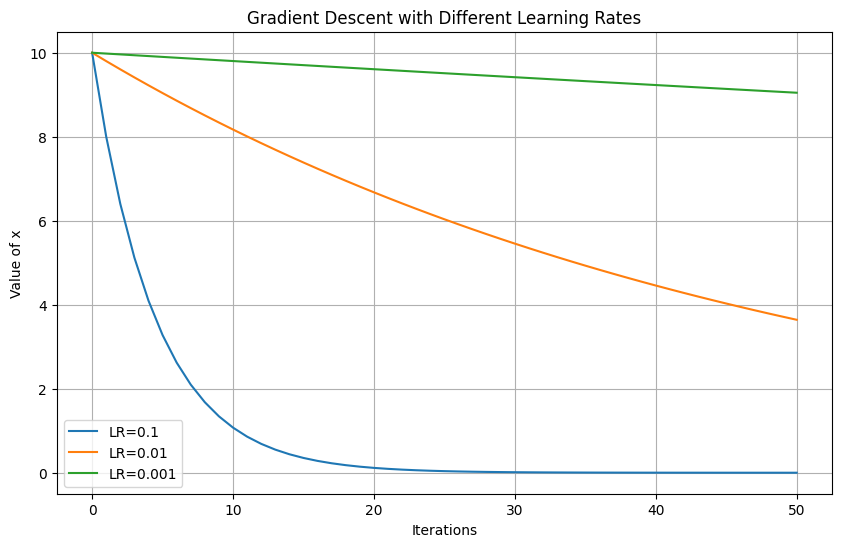

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Function to minimize (example)
def f(x):
    return x**2

# Gradient of the function
def gradient_f(x):
    return 2*x

# Gradient descent algorithm
def gradient_descent(learning_rate, iterations):
    x = 10  # Initial guess
    trajectory = [x]

    for _ in range(iterations):
        gradient = gradient_f(x)
        x = x - learning_rate * gradient
        trajectory.append(x)

    return trajectory

# Visualization
def visualize_learning_rates(learning_rates, iterations):
    plt.figure(figsize=(10, 6))

    for lr in learning_rates:
        trajectory = gradient_descent(lr, iterations)
        plt.plot(range(iterations + 1), trajectory, label=f'LR={lr}')

    plt.title('Gradient Descent with Different Learning Rates')
    plt.xlabel('Iterations')
    plt.ylabel('Value of x')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
learning_rates = [0.1, 0.01, 0.001]
iterations = 50

# Visualize
visualize_learning_rates(learning_rates, iterations)


## Training Loss vs. Iterations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Adam, Adagrad
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with different optimizers
optimizers = {
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adam': Adam(),
    'Adagrad': Adagrad()
}

# Dictionary to store training loss for each optimizer
training_loss = {optimizer: [] for optimizer in optimizers}

# Train the model with each optimizer and record the training loss
num_epochs = 50
batch_size = 32
for optimizer_name, optimizer in optimizers.items():
    print(f'Training with {optimizer_name} optimizer...')
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size, verbose=0)
    training_loss[optimizer_name] = history.history['loss']

# Plot the training loss versus iterations for each optimizer
plt.figure(figsize=(10, 6))
for optimizer_name, loss_values in training_loss.items():
    plt.plot(range(1, num_epochs + 1), loss_values, label=optimizer_name)
plt.title('Training Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion
In this notebook, we explored how different optimizers affect the training of a regression model on the Boston housing dataset. Each optimizer has its strengths and is suited to different kinds of problems.